[View in Colaboratory](https://colab.research.google.com/github/Naritoshi/colabo_cats_and_dogs/blob/master/cats_and_docs.ipynb)

#Google Colaboratory を使って、Chainer で 犬、猫の分類に挑戦する！

##概要



Connpassの「Chainer x Azure ML Hackathon CV編」に参加してきた際に、
「Cats and Dogs」の分類にをしてみてはどうでしょう と頂いたので、挑戦してみました。
GPUを持っていないので、「Google Colaboratory」を使いました。

以下の点で勉強になりました。
・Chainerを利用し、CNN用の画像を読み込ませる方法
・画像のリサイズ、リシェイプ
・Google Colaboratoryと、GoogleDriveの連携

DeepLearning は、理解できていない部分もあるので、間違っているかもしれません。
その時は、指摘いただけると、ありがたいです！


## 環境構築

### [Google Colaboratory](https://colab.research.google.com/) で、ノートブックを新規作成する

「ファイル 」ｰ 「Python3のノートブックを新規作成」をクリックします。

### colabをGPUインスタンスにする。

ランタイム - ランタイムのタイプを選択  より、ハードウェアアクセラレータをGPUに変更し、保存します。

### Chainerのインストール

[ここ](https://qiita.com/keisuke-umezawa/items/4e99c2a4f5f07567444c)を参考にしました。

In [1]:
!pip uninstall chainer -y
!pip uninstall cupy-cuda80 -y
!apt -y install libcusparse8.0 libnvrtc8.0 libnvtoolsext1
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!pip install 'chainer==4.0.0b4' 'cupy-cuda80==4.0.0b4'

Skipping chainer as it is not installed.
Skipping cupy-cuda80 as it is not installed.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libcusparse8.0 libnvrtc8.0 libnvtoolsext1
0 upgraded, 3 newly installed, 0 to remove and 0 not upgraded.
Need to get 28.9 MB of archives.
After this operation, 71.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/multiverse amd64 libcusparse8.0 amd64 8.0.61-1 [22.6 MB]
Get:2 http://archive.ubuntu.com/ubuntu artful/multiverse amd64 libnvrtc8.0 amd64 8.0.61-1 [6,225 kB]
Get:3 http://archive.ubuntu.com/ubuntu artful/multiverse amd64 libnvtoolsext1 amd64 8.0.61-1 [32.2 kB]
Fetched 28.9 MB in 1s (16.4 MB/s)

78Selecting previously unselected package libcusparse8.0:amd64.
(Reading database ... 18298 files and directories currently installed.)
Preparing to unpack .../libcusparse8.0_8.0.61-1_amd64.deb ...
7Progress: [  0%] [.

    100% |████████████████████████████████| 205.4MB 124kB/s 
    100% |████████████████████████████████| 81kB 19.1MB/s 
  Running setup.py bdist_wheel for chainer ... - \ | / - done
  Stored in directory: /content/.cache/pip/wheels/89/2e/12/fe6441d846a967c24ded700e140bc2a71f56044199b72f33dc
  Running setup.py bdist_wheel for filelock ... - done
  Stored in directory: /content/.cache/pip/wheels/35/ba/67/4cc48738870c3b54f9e3b5d78bf9de130befb70c1d359faf8b
Successfully built chainer filelock


In [2]:
!pip install chainer -U
!pip install cupy-cuda80 -U

    100% |████████████████████████████████| 399kB 5.2MB/s 
Requirement not upgraded as not directly required: filelock in /usr/local/lib/python3.6/dist-packages (from chainer) (3.0.4)
Requirement not upgraded as not directly required: numpy>=1.9.0 in /usr/local/lib/python3.6/dist-packages (from chainer) (1.14.3)
Requirement not upgraded as not directly required: protobuf>=3.0.0 in /usr/local/lib/python3.6/dist-packages (from chainer) (3.5.2.post1)
Requirement not upgraded as not directly required: six>=1.9.0 in /usr/local/lib/python3.6/dist-packages (from chainer) (1.11.0)
    79% |█████████████████████████▍      | 154.1MB 20.2MB/s eta 0:00:02

    100% |████████████████████████████████| 194.0MB 89kB/s 
Requirement not upgraded as not directly required: setuptools in /usr/local/lib/python3.6/dist-packages (from protobuf>=3.0.0->chainer) (39.2.0)
Requirement not upgraded as not directly required: fastrlock>=0.3 in /usr/local/lib/python3.6/dist-packages (from cupy-cuda80==4.1.0->chainer) (0.3)
  Running setup.py bdist_wheel for chainer ... - \ | / - \ done
  Stored in directory: /content/.cache/pip/wheels/f7/bc/ce/ded86aa42c54308c8bc62410164af1c614cdecc0df3a204af4
Successfully built chainer
  Found existing installation: cupy-cuda80 4.0.0b4
    Uninstalling cupy-cuda80-4.0.0b4:
      Successfully uninstalled cupy-cuda80-4.0.0b4
  Found existing installation: chainer 4.0.0b4
    Uninstalling chainer-4.0.0b4:
      Successfully uninstalled chainer-4.0.0b4
Requirement already up-to-date: cupy-cuda80 in /usr/local/lib/python3.6/dist-packages (4.1.0)
Requirement not upgraded as not directly required: six>=1.9.0 in /usr/l

### GPUが有効になっていることを確認する
**★ランタイムの再起動が必要かも**

以下のようになっていれば、有効になっているようです

GPU availability: True

cuDNN availablility: True

In [3]:
import chainer
import cupy
chainer.print_runtime_info()
print('GPU availability:', chainer.cuda.available)
print('cuDNN availablility:', chainer.cuda.cudnn_enabled)

Chainer: 4.1.0
NumPy: 1.14.3
CuPy:
  CuPy Version          : 4.1.0
  CUDA Root             : None
  CUDA Build Version    : 8000
  CUDA Driver Version   : 9000
  CUDA Runtime Version  : 8000
  cuDNN Build Version   : 7102
  cuDNN Version         : 7102
  NCCL Build Version    : 2104
GPU availability: True
cuDNN availablility: True


## 犬、猫のデータを取得、解凍する

###データのダウンロード

In [0]:
import os
import requests
import zipfile

file_name = "dogscats.zip"
url='http://files.fast.ai/data/dogscats.zip'
response = requests.get(url)
with open(os.path.join("./", file_name), 'wb') as f:
    f.write(response.content)

In [6]:
#ダウンロードできた確認する
%%bash
ls

datalab
dogscats.zip


[マイクロソフトのサイト](https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765)からダウンロードしたら、
「unzip」に失敗したので、
[この記事](https://github.com/pypa/pipenv/issues/581)を見て、
[ここ](http://files.fast.ai/data/dogscats.zip)からダウンロードすることにしました。

### 解凍する

In [7]:
!unzip dogscats.zip

Archive:  dogscats.zip
   creating: dogscats/
   creating: dogscats/sample/
   creating: dogscats/sample/train/
   creating: dogscats/sample/train/cats/
  inflating: dogscats/sample/train/cats/cat.2921.jpg  
  inflating: dogscats/sample/train/cats/cat.394.jpg  
  inflating: dogscats/sample/train/cats/cat.4865.jpg  
  inflating: dogscats/sample/train/cats/cat.3570.jpg  
  inflating: dogscats/sample/train/cats/cat.2266.jpg  
  inflating: dogscats/sample/train/cats/cat.9021.jpg  
  inflating: dogscats/sample/train/cats/cat.11737.jpg  
  inflating: dogscats/sample/train/cats/cat.4600.jpg  
   creating: dogscats/sample/train/dogs/
  inflating: dogscats/sample/train/dogs/dog.1402.jpg  
  inflating: dogscats/sample/train/dogs/dog.1614.jpg  
  inflating: dogscats/sample/train/dogs/dog.8643.jpg  
  inflating: dogscats/sample/train/dogs/dog.6391.jpg  
  inflating: dogscats/sample/train/dogs/dog.2423.jpg  
  inflating: dogscats/sample/train/dogs/dog.9077.jpg  
  inflating: dogscats/sample/train/d

  inflating: dogscats/train/cats/cat.11287.jpg  
  inflating: dogscats/train/cats/cat.11873.jpg  
  inflating: dogscats/train/cats/cat.4288.jpg  
  inflating: dogscats/train/cats/cat.1296.jpg  
  inflating: dogscats/train/cats/cat.11611.jpg  
  inflating: dogscats/train/cats/cat.10087.jpg  
  inflating: dogscats/train/cats/cat.4193.jpg  
  inflating: dogscats/train/cats/cat.7254.jpg  
  inflating: dogscats/train/cats/cat.2809.jpg  
  inflating: dogscats/train/cats/cat.9584.jpg  
  inflating: dogscats/train/cats/cat.6081.jpg  
  inflating: dogscats/train/cats/cat.11679.jpg  
  inflating: dogscats/train/cats/cat.5628.jpg  
  inflating: dogscats/train/cats/cat.5851.jpg  
  inflating: dogscats/train/cats/cat.6367.jpg  
  inflating: dogscats/train/cats/cat.7700.jpg  
  inflating: dogscats/train/cats/cat.4701.jpg  
  inflating: dogscats/train/cats/cat.10805.jpg  
  inflating: dogscats/train/cats/cat.244.jpg  
  inflating: dogscats/train/cats/cat.7605.jpg  
  inflating: dogscats/train/cats/ca


  inflating: dogscats/train/cats/cat.1526.jpg  
  inflating: dogscats/train/cats/cat.3716.jpg  
  inflating: dogscats/train/cats/cat.12285.jpg  
  inflating: dogscats/train/cats/cat.5472.jpg  
  inflating: dogscats/train/cats/cat.9119.jpg  
  inflating: dogscats/train/cats/cat.7656.jpg  
  inflating: dogscats/train/cats/cat.2760.jpg  
  inflating: dogscats/train/cats/cat.8214.jpg  
  inflating: dogscats/train/cats/cat.4443.jpg  
  inflating: dogscats/train/cats/cat.10838.jpg  
  inflating: dogscats/train/cats/cat.2916.jpg  
  inflating: dogscats/train/cats/cat.9345.jpg  
  inflating: dogscats/train/cats/cat.10858.jpg  
  inflating: dogscats/train/cats/cat.5126.jpg  
  inflating: dogscats/train/cats/cat.6176.jpg  
  inflating: dogscats/train/cats/cat.776.jpg  
  inflating: dogscats/train/cats/cat.12225.jpg  
  inflating: dogscats/train/cats/cat.2279.jpg  
  inflating: dogscats/train/cats/cat.3827.jpg  
  inflating: dogscats/train/cats/cat.11613.jpg  
  inflating: dogscats/train/cats/ca

  inflating: dogscats/train/cats/cat.5695.jpg  
  inflating: dogscats/train/cats/cat.4365.jpg  
  inflating: dogscats/train/cats/cat.9493.jpg  
  inflating: dogscats/train/cats/cat.2512.jpg  
  inflating: dogscats/train/cats/cat.6034.jpg  
  inflating: dogscats/train/cats/cat.84.jpg  
  inflating: dogscats/train/cats/cat.7512.jpg  
  inflating: dogscats/train/cats/cat.2043.jpg  
  inflating: dogscats/train/cats/cat.11768.jpg  
  inflating: dogscats/train/cats/cat.2838.jpg  
  inflating: dogscats/train/cats/cat.9637.jpg  
  inflating: dogscats/train/cats/cat.9940.jpg  
  inflating: dogscats/train/cats/cat.9983.jpg  
  inflating: dogscats/train/cats/cat.3819.jpg  
  inflating: dogscats/train/cats/cat.4318.jpg  
  inflating: dogscats/train/cats/cat.3131.jpg  
  inflating: dogscats/train/cats/cat.2240.jpg  
  inflating: dogscats/train/cats/cat.7794.jpg  
  inflating: dogscats/train/cats/cat.5964.jpg  
  inflating: dogscats/train/cats/cat.9321.jpg  
  inflating: dogscats/train/cats/cat.1191


  inflating: dogscats/train/cats/cat.2609.jpg  
  inflating: dogscats/train/cats/cat.2388.jpg  
  inflating: dogscats/train/cats/cat.6411.jpg  
  inflating: dogscats/train/cats/cat.10269.jpg  
  inflating: dogscats/train/cats/cat.2613.jpg  
  inflating: dogscats/train/cats/cat.5102.jpg  
  inflating: dogscats/train/cats/cat.5615.jpg  
  inflating: dogscats/train/cats/cat.11793.jpg  
  inflating: dogscats/train/cats/cat.7045.jpg  
  inflating: dogscats/train/cats/cat.6685.jpg  
  inflating: dogscats/train/cats/cat.6749.jpg  
  inflating: dogscats/train/cats/cat.9671.jpg  
  inflating: dogscats/train/cats/cat.9295.jpg  
  inflating: dogscats/train/cats/cat.12222.jpg  
  inflating: dogscats/train/cats/cat.7291.jpg  
  inflating: dogscats/train/cats/cat.8698.jpg  
  inflating: dogscats/train/cats/cat.1507.jpg  
  inflating: dogscats/train/cats/cat.12101.jpg  
  inflating: dogscats/train/cats/cat.12421.jpg  
  inflating: dogscats/train/cats/cat.4562.jpg  
  inflating: dogscats/train/cats/c


  inflating: dogscats/train/cats/cat.10655.jpg  
  inflating: dogscats/train/cats/cat.4305.jpg  
  inflating: dogscats/train/cats/cat.8128.jpg  
  inflating: dogscats/train/cats/cat.6979.jpg  
  inflating: dogscats/train/cats/cat.8388.jpg  
  inflating: dogscats/train/cats/cat.3218.jpg  
  inflating: dogscats/train/cats/cat.8620.jpg  
  inflating: dogscats/train/cats/cat.3941.jpg  
  inflating: dogscats/train/cats/cat.808.jpg  
  inflating: dogscats/train/cats/cat.3144.jpg  
  inflating: dogscats/train/cats/cat.1268.jpg  
  inflating: dogscats/train/cats/cat.8557.jpg  
  inflating: dogscats/train/cats/cat.2697.jpg  
  inflating: dogscats/train/cats/cat.2965.jpg  
  inflating: dogscats/train/cats/cat.2440.jpg  
  inflating: dogscats/train/cats/cat.1065.jpg  
  inflating: dogscats/train/cats/cat.3471.jpg  
  inflating: dogscats/train/cats/cat.5762.jpg  
  inflating: dogscats/train/cats/cat.7008.jpg  
  inflating: dogscats/train/cats/cat.3998.jpg  
  inflating: dogscats/train/cats/cat.12


  inflating: dogscats/train/cats/cat.4660.jpg  
  inflating: dogscats/train/cats/cat.5492.jpg  
  inflating: dogscats/train/cats/cat.12235.jpg  
  inflating: dogscats/train/cats/cat.3589.jpg  
  inflating: dogscats/train/cats/cat.4296.jpg  
  inflating: dogscats/train/cats/cat.6968.jpg  
  inflating: dogscats/train/cats/cat.3346.jpg  
  inflating: dogscats/train/cats/cat.6640.jpg  
  inflating: dogscats/train/cats/cat.1236.jpg  
  inflating: dogscats/train/cats/cat.309.jpg  
  inflating: dogscats/train/cats/cat.6710.jpg  
  inflating: dogscats/train/cats/cat.4578.jpg  
  inflating: dogscats/train/cats/cat.5220.jpg  
  inflating: dogscats/train/cats/cat.1883.jpg  
  inflating: dogscats/train/cats/cat.10743.jpg  
  inflating: dogscats/train/cats/cat.1405.jpg  
  inflating: dogscats/train/cats/cat.4996.jpg  
  inflating: dogscats/train/cats/cat.4682.jpg  
  inflating: dogscats/train/cats/cat.2036.jpg  
  inflating: dogscats/train/cats/cat.11317.jpg  
  inflating: dogscats/train/cats/cat.

  inflating: dogscats/train/cats/cat.5890.jpg  
  inflating: dogscats/train/cats/cat.11109.jpg  
  inflating: dogscats/train/cats/cat.4114.jpg  
  inflating: dogscats/train/cats/cat.4871.jpg  
  inflating: dogscats/train/cats/cat.2099.jpg  
  inflating: dogscats/train/cats/cat.3697.jpg  
  inflating: dogscats/train/cats/cat.4041.jpg  
  inflating: dogscats/train/cats/cat.8974.jpg  
  inflating: dogscats/train/cats/cat.3436.jpg  
  inflating: dogscats/train/cats/cat.6914.jpg  
  inflating: dogscats/train/cats/cat.1308.jpg  
  inflating: dogscats/train/cats/cat.3390.jpg  
  inflating: dogscats/train/cats/cat.4591.jpg  
  inflating: dogscats/train/cats/cat.607.jpg  
  inflating: dogscats/train/cats/cat.1448.jpg  
  inflating: dogscats/train/cats/cat.3863.jpg  
  inflating: dogscats/train/cats/cat.7185.jpg  
  inflating: dogscats/train/cats/cat.7945.jpg  
  inflating: dogscats/train/cats/cat.642.jpg  
  inflating: dogscats/train/cats/cat.2839.jpg  
  inflating: dogscats/train/cats/cat.349.


  inflating: dogscats/train/cats/cat.4340.jpg  
  inflating: dogscats/train/cats/cat.7693.jpg  
  inflating: dogscats/train/cats/cat.4079.jpg  
  inflating: dogscats/train/cats/cat.7956.jpg  
  inflating: dogscats/train/cats/cat.6718.jpg  
  inflating: dogscats/train/cats/cat.10537.jpg  
  inflating: dogscats/train/cats/cat.11218.jpg  
  inflating: dogscats/train/cats/cat.7720.jpg  
  inflating: dogscats/train/cats/cat.6254.jpg  
  inflating: dogscats/train/cats/cat.8718.jpg  
  inflating: dogscats/train/cats/cat.1879.jpg  
  inflating: dogscats/train/cats/cat.10576.jpg  
  inflating: dogscats/train/cats/cat.6915.jpg  
  inflating: dogscats/train/cats/cat.7861.jpg  
  inflating: dogscats/train/cats/cat.1163.jpg  
  inflating: dogscats/train/cats/cat.1527.jpg  
  inflating: dogscats/train/cats/cat.3690.jpg  
  inflating: dogscats/train/cats/cat.8039.jpg  
  inflating: dogscats/train/cats/cat.10317.jpg  
  inflating: dogscats/train/cats/cat.300.jpg  
  inflating: dogscats/train/cats/cat


  inflating: dogscats/train/cats/cat.7953.jpg  
  inflating: dogscats/train/cats/cat.2828.jpg  
  inflating: dogscats/train/cats/cat.9448.jpg  
  inflating: dogscats/train/cats/cat.7252.jpg  
  inflating: dogscats/train/cats/cat.2016.jpg  
  inflating: dogscats/train/cats/cat.347.jpg  
  inflating: dogscats/train/cats/cat.8312.jpg  
  inflating: dogscats/train/cats/cat.8986.jpg  
  inflating: dogscats/train/cats/cat.261.jpg  
  inflating: dogscats/train/cats/cat.9174.jpg  
  inflating: dogscats/train/cats/cat.12482.jpg  
  inflating: dogscats/train/cats/cat.5709.jpg  
  inflating: dogscats/train/cats/cat.8108.jpg  
  inflating: dogscats/train/cats/cat.2596.jpg  
  inflating: dogscats/train/cats/cat.4467.jpg  
  inflating: dogscats/train/cats/cat.5076.jpg  
  inflating: dogscats/train/cats/cat.6469.jpg  
  inflating: dogscats/train/cats/cat.7669.jpg  
  inflating: dogscats/train/cats/cat.6905.jpg  
  inflating: dogscats/train/cats/cat.11012.jpg  
  inflating: dogscats/train/cats/cat.55


  inflating: dogscats/train/cats/cat.4714.jpg  
  inflating: dogscats/train/cats/cat.4693.jpg  
  inflating: dogscats/train/cats/cat.7209.jpg  
  inflating: dogscats/train/cats/cat.11185.jpg  
  inflating: dogscats/train/cats/cat.9712.jpg  
  inflating: dogscats/train/cats/cat.10366.jpg  
  inflating: dogscats/train/cats/cat.10717.jpg  
  inflating: dogscats/train/cats/cat.4488.jpg  
  inflating: dogscats/train/cats/cat.6784.jpg  
  inflating: dogscats/train/cats/cat.926.jpg  
  inflating: dogscats/train/cats/cat.5835.jpg  
  inflating: dogscats/train/cats/cat.490.jpg  
  inflating: dogscats/train/cats/cat.11154.jpg  
  inflating: dogscats/train/cats/cat.1015.jpg  
  inflating: dogscats/train/cats/cat.8582.jpg  
  inflating: dogscats/train/cats/cat.2381.jpg  
  inflating: dogscats/train/cats/cat.798.jpg  
  inflating: dogscats/train/cats/cat.8873.jpg  
  inflating: dogscats/train/cats/cat.10740.jpg  
  inflating: dogscats/train/cats/cat.8120.jpg  
  inflating: dogscats/train/cats/cat.

  inflating: dogscats/train/cats/cat.8769.jpg  
  inflating: dogscats/train/cats/cat.7564.jpg  
  inflating: dogscats/train/cats/cat.10287.jpg  
  inflating: dogscats/train/cats/cat.4940.jpg  
  inflating: dogscats/train/cats/cat.7805.jpg  
  inflating: dogscats/train/cats/cat.4787.jpg  
  inflating: dogscats/train/cats/cat.8380.jpg  
  inflating: dogscats/train/cats/cat.847.jpg  
  inflating: dogscats/train/cats/cat.4741.jpg  
  inflating: dogscats/train/cats/cat.11211.jpg  
  inflating: dogscats/train/cats/cat.6133.jpg  
  inflating: dogscats/train/cats/cat.12311.jpg  
  inflating: dogscats/train/cats/cat.10283.jpg  
  inflating: dogscats/train/cats/cat.1873.jpg  
  inflating: dogscats/train/cats/cat.3854.jpg  
  inflating: dogscats/train/cats/cat.5611.jpg  
  inflating: dogscats/train/cats/cat.7303.jpg  
  inflating: dogscats/train/cats/cat.8195.jpg  
  inflating: dogscats/train/cats/cat.11830.jpg  
  inflating: dogscats/train/cats/cat.12434.jpg  
  inflating: dogscats/train/cats/ca

  inflating: dogscats/train/cats/cat.1620.jpg  
  inflating: dogscats/train/cats/cat.5642.jpg  
  inflating: dogscats/train/cats/cat.8194.jpg  
  inflating: dogscats/train/cats/cat.3516.jpg  
  inflating: dogscats/train/cats/cat.268.jpg  
  inflating: dogscats/train/cats/cat.7099.jpg  
  inflating: dogscats/train/cats/cat.6026.jpg  
  inflating: dogscats/train/cats/cat.9566.jpg  
  inflating: dogscats/train/cats/cat.9865.jpg  
  inflating: dogscats/train/cats/cat.7270.jpg  
  inflating: dogscats/train/cats/cat.1864.jpg  
  inflating: dogscats/train/cats/cat.4613.jpg  
  inflating: dogscats/train/cats/cat.7474.jpg  
  inflating: dogscats/train/cats/cat.5847.jpg  
  inflating: dogscats/train/cats/cat.11345.jpg  
  inflating: dogscats/train/cats/cat.1476.jpg  
  inflating: dogscats/train/cats/cat.10429.jpg  
  inflating: dogscats/train/cats/cat.10361.jpg  
  inflating: dogscats/train/cats/cat.10793.jpg  
  inflating: dogscats/train/cats/cat.11097.jpg  
  inflating: dogscats/train/cats/cat


  inflating: dogscats/train/cats/cat.5451.jpg  
  inflating: dogscats/train/cats/cat.1130.jpg  
  inflating: dogscats/train/cats/cat.5256.jpg  
  inflating: dogscats/train/cats/cat.8453.jpg  
  inflating: dogscats/train/cats/cat.4750.jpg  
  inflating: dogscats/train/cats/cat.11776.jpg  
  inflating: dogscats/train/cats/cat.5093.jpg  
  inflating: dogscats/train/cats/cat.11182.jpg  
  inflating: dogscats/train/cats/cat.197.jpg  
  inflating: dogscats/train/cats/cat.10648.jpg  
  inflating: dogscats/train/cats/cat.9921.jpg  
  inflating: dogscats/train/cats/cat.2730.jpg  
  inflating: dogscats/train/cats/cat.1080.jpg  
  inflating: dogscats/train/cats/cat.2136.jpg  
  inflating: dogscats/train/cats/cat.5921.jpg  
  inflating: dogscats/train/cats/cat.11508.jpg  
  inflating: dogscats/train/cats/cat.3079.jpg  
  inflating: dogscats/train/cats/cat.5748.jpg  
  inflating: dogscats/train/cats/cat.4017.jpg  
  inflating: dogscats/train/cats/cat.1138.jpg  
  inflating: dogscats/train/cats/cat


  inflating: dogscats/train/cats/cat.11626.jpg  
  inflating: dogscats/train/cats/cat.2906.jpg  
  inflating: dogscats/train/cats/cat.885.jpg  
  inflating: dogscats/train/cats/cat.3125.jpg  
  inflating: dogscats/train/cats/cat.1387.jpg  
  inflating: dogscats/train/cats/cat.9214.jpg  
  inflating: dogscats/train/cats/cat.1618.jpg  
  inflating: dogscats/train/cats/cat.3812.jpg  
  inflating: dogscats/train/cats/cat.10350.jpg  
  inflating: dogscats/train/cats/cat.7259.jpg  
  inflating: dogscats/train/cats/cat.6428.jpg  
  inflating: dogscats/train/cats/cat.8353.jpg  
  inflating: dogscats/train/cats/cat.1247.jpg  
  inflating: dogscats/train/cats/cat.1206.jpg  
  inflating: dogscats/train/cats/cat.11319.jpg  
  inflating: dogscats/train/cats/cat.4213.jpg  
  inflating: dogscats/train/cats/cat.10665.jpg  
  inflating: dogscats/train/cats/cat.5324.jpg  
  inflating: dogscats/train/cats/cat.10619.jpg  
  inflating: dogscats/train/cats/cat.3600.jpg  
  inflating: dogscats/train/cats/ca


  inflating: dogscats/train/cats/cat.1886.jpg  
  inflating: dogscats/train/cats/cat.1072.jpg  
  inflating: dogscats/train/cats/cat.123.jpg  
  inflating: dogscats/train/cats/cat.11338.jpg  
  inflating: dogscats/train/cats/cat.12439.jpg  
  inflating: dogscats/train/cats/cat.6429.jpg  
  inflating: dogscats/train/cats/cat.4642.jpg  
  inflating: dogscats/train/cats/cat.3757.jpg  
  inflating: dogscats/train/cats/cat.3269.jpg  
  inflating: dogscats/train/cats/cat.8494.jpg  
  inflating: dogscats/train/cats/cat.7934.jpg  
  inflating: dogscats/train/cats/cat.8407.jpg  
  inflating: dogscats/train/cats/cat.7594.jpg  
  inflating: dogscats/train/cats/cat.10334.jpg  
  inflating: dogscats/train/cats/cat.7101.jpg  
  inflating: dogscats/train/cats/cat.10549.jpg  
  inflating: dogscats/train/cats/cat.970.jpg  
  inflating: dogscats/train/cats/cat.11688.jpg  
  inflating: dogscats/train/cats/cat.2864.jpg  
  inflating: dogscats/train/cats/cat.6373.jpg  
  inflating: dogscats/train/cats/cat

  inflating: dogscats/train/cats/cat.5809.jpg  
  inflating: dogscats/train/cats/cat.6834.jpg  
  inflating: dogscats/train/cats/cat.6846.jpg  
  inflating: dogscats/train/cats/cat.821.jpg  
  inflating: dogscats/train/cats/cat.3394.jpg  
  inflating: dogscats/train/cats/cat.11095.jpg  
  inflating: dogscats/train/cats/cat.11221.jpg  
  inflating: dogscats/train/cats/cat.11709.jpg  
  inflating: dogscats/train/cats/cat.5604.jpg  
  inflating: dogscats/train/cats/cat.1207.jpg  
  inflating: dogscats/train/cats/cat.1664.jpg  
  inflating: dogscats/train/cats/cat.11858.jpg  
  inflating: dogscats/train/cats/cat.3995.jpg  
  inflating: dogscats/train/cats/cat.3149.jpg  
  inflating: dogscats/train/cats/cat.2104.jpg  
  inflating: dogscats/train/cats/cat.3103.jpg  
  inflating: dogscats/train/cats/cat.5312.jpg  
  inflating: dogscats/train/cats/cat.9820.jpg  
  inflating: dogscats/train/cats/cat.10351.jpg  
  inflating: dogscats/train/cats/cat.8464.jpg  
  inflating: dogscats/train/cats/cat


  inflating: dogscats/train/cats/cat.10054.jpg  
  inflating: dogscats/train/cats/cat.10243.jpg  
  inflating: dogscats/train/cats/cat.2842.jpg  
  inflating: dogscats/train/cats/cat.5502.jpg  
  inflating: dogscats/train/cats/cat.10587.jpg  
  inflating: dogscats/train/cats/cat.7698.jpg  
  inflating: dogscats/train/cats/cat.12366.jpg  
  inflating: dogscats/train/cats/cat.10920.jpg  
  inflating: dogscats/train/cats/cat.11601.jpg  
  inflating: dogscats/train/cats/cat.1612.jpg  
  inflating: dogscats/train/cats/cat.5570.jpg  
  inflating: dogscats/train/cats/cat.12398.jpg  
  inflating: dogscats/train/cats/cat.10677.jpg  
  inflating: dogscats/train/cats/cat.4229.jpg  
  inflating: dogscats/train/cats/cat.10160.jpg  
  inflating: dogscats/train/cats/cat.30.jpg  
  inflating: dogscats/train/cats/cat.2841.jpg  
  inflating: dogscats/train/cats/cat.5902.jpg  
  inflating: dogscats/train/cats/cat.62.jpg  
  inflating: dogscats/train/cats/cat.6188.jpg  
  inflating: dogscats/train/cats/c


  inflating: dogscats/train/dogs/dog.2195.jpg  
  inflating: dogscats/train/dogs/dog.5538.jpg  
  inflating: dogscats/train/dogs/dog.9971.jpg  
  inflating: dogscats/train/dogs/dog.1253.jpg  
  inflating: dogscats/train/dogs/dog.9523.jpg  
  inflating: dogscats/train/dogs/dog.5418.jpg  
  inflating: dogscats/train/dogs/dog.11585.jpg  
  inflating: dogscats/train/dogs/dog.4576.jpg  
  inflating: dogscats/train/dogs/dog.756.jpg  
  inflating: dogscats/train/dogs/dog.4979.jpg  
  inflating: dogscats/train/dogs/dog.9251.jpg  
  inflating: dogscats/train/dogs/dog.10794.jpg  
  inflating: dogscats/train/dogs/dog.4955.jpg  
  inflating: dogscats/train/dogs/dog.9493.jpg  
  inflating: dogscats/train/dogs/dog.5763.jpg  
  inflating: dogscats/train/dogs/dog.11957.jpg  
  inflating: dogscats/train/dogs/dog.10691.jpg  
  inflating: dogscats/train/dogs/dog.2196.jpg  
  inflating: dogscats/train/dogs/dog.6182.jpg  
  inflating: dogscats/train/dogs/dog.2222.jpg  
  inflating: dogscats/train/dogs/dog


  inflating: dogscats/train/dogs/dog.3552.jpg  
  inflating: dogscats/train/dogs/dog.9215.jpg  
  inflating: dogscats/train/dogs/dog.8283.jpg  
  inflating: dogscats/train/dogs/dog.10891.jpg  
  inflating: dogscats/train/dogs/dog.6421.jpg  
  inflating: dogscats/train/dogs/dog.6833.jpg  
  inflating: dogscats/train/dogs/dog.9883.jpg  
  inflating: dogscats/train/dogs/dog.6214.jpg  
  inflating: dogscats/train/dogs/dog.3721.jpg  
  inflating: dogscats/train/dogs/dog.6245.jpg  
  inflating: dogscats/train/dogs/dog.11372.jpg  
  inflating: dogscats/train/dogs/dog.11266.jpg  
  inflating: dogscats/train/dogs/dog.10446.jpg  
  inflating: dogscats/train/dogs/dog.3855.jpg  
  inflating: dogscats/train/dogs/dog.2932.jpg  
  inflating: dogscats/train/dogs/dog.7305.jpg  
  inflating: dogscats/train/dogs/dog.8343.jpg  
  inflating: dogscats/train/dogs/dog.8354.jpg  
  inflating: dogscats/train/dogs/dog.10361.jpg  
  inflating: dogscats/train/dogs/dog.7288.jpg  
  inflating: dogscats/train/dogs/d


  inflating: dogscats/train/dogs/dog.6520.jpg  
  inflating: dogscats/train/dogs/dog.3878.jpg  
  inflating: dogscats/train/dogs/dog.1826.jpg  
  inflating: dogscats/train/dogs/dog.9693.jpg  
  inflating: dogscats/train/dogs/dog.3346.jpg  
  inflating: dogscats/train/dogs/dog.11.jpg  
  inflating: dogscats/train/dogs/dog.2660.jpg  
  inflating: dogscats/train/dogs/dog.3173.jpg  
  inflating: dogscats/train/dogs/dog.6873.jpg  
  inflating: dogscats/train/dogs/dog.5993.jpg  
  inflating: dogscats/train/dogs/dog.8018.jpg  
  inflating: dogscats/train/dogs/dog.10310.jpg  
  inflating: dogscats/train/dogs/dog.4672.jpg  
  inflating: dogscats/train/dogs/dog.8082.jpg  
  inflating: dogscats/train/dogs/dog.2580.jpg  
  inflating: dogscats/train/dogs/dog.11594.jpg  
  inflating: dogscats/train/dogs/dog.9061.jpg  
  inflating: dogscats/train/dogs/dog.10900.jpg  
  inflating: dogscats/train/dogs/dog.67.jpg  
  inflating: dogscats/train/dogs/dog.1813.jpg  
  inflating: dogscats/train/dogs/dog.109


  inflating: dogscats/train/dogs/dog.11382.jpg  
  inflating: dogscats/train/dogs/dog.975.jpg  
  inflating: dogscats/train/dogs/dog.2860.jpg  
  inflating: dogscats/train/dogs/dog.10607.jpg  
  inflating: dogscats/train/dogs/dog.2495.jpg  
  inflating: dogscats/train/dogs/dog.2966.jpg  
  inflating: dogscats/train/dogs/dog.1684.jpg  
  inflating: dogscats/train/dogs/dog.7898.jpg  
  inflating: dogscats/train/dogs/dog.11976.jpg  
  inflating: dogscats/train/dogs/dog.4197.jpg  
  inflating: dogscats/train/dogs/dog.3528.jpg  
  inflating: dogscats/train/dogs/dog.2654.jpg  
  inflating: dogscats/train/dogs/dog.697.jpg  
  inflating: dogscats/train/dogs/dog.2688.jpg  
  inflating: dogscats/train/dogs/dog.4420.jpg  
  inflating: dogscats/train/dogs/dog.11434.jpg  
  inflating: dogscats/train/dogs/dog.9295.jpg  
  inflating: dogscats/train/dogs/dog.7293.jpg  
  inflating: dogscats/train/dogs/dog.4652.jpg  
  inflating: dogscats/train/dogs/dog.5330.jpg  
  inflating: dogscats/train/dogs/dog.


  inflating: dogscats/train/dogs/dog.5.jpg  
  inflating: dogscats/train/dogs/dog.1200.jpg  
  inflating: dogscats/train/dogs/dog.8049.jpg  
  inflating: dogscats/train/dogs/dog.7418.jpg  
  inflating: dogscats/train/dogs/dog.9863.jpg  
  inflating: dogscats/train/dogs/dog.1698.jpg  
  inflating: dogscats/train/dogs/dog.5216.jpg  
  inflating: dogscats/train/dogs/dog.2519.jpg  
  inflating: dogscats/train/dogs/dog.8161.jpg  
  inflating: dogscats/train/dogs/dog.4666.jpg  
  inflating: dogscats/train/dogs/dog.3785.jpg  
  inflating: dogscats/train/dogs/dog.1073.jpg  
  inflating: dogscats/train/dogs/dog.12093.jpg  
  inflating: dogscats/train/dogs/dog.169.jpg  
  inflating: dogscats/train/dogs/dog.6982.jpg  
  inflating: dogscats/train/dogs/dog.3083.jpg  
  inflating: dogscats/train/dogs/dog.4714.jpg  
  inflating: dogscats/train/dogs/dog.1195.jpg  
  inflating: dogscats/train/dogs/dog.6249.jpg  
  inflating: dogscats/train/dogs/dog.11765.jpg  
  inflating: dogscats/train/dogs/dog.8998


  inflating: dogscats/train/dogs/dog.115.jpg  
  inflating: dogscats/train/dogs/dog.2208.jpg  
  inflating: dogscats/train/dogs/dog.2217.jpg  
  inflating: dogscats/train/dogs/dog.3011.jpg  
  inflating: dogscats/train/dogs/dog.1842.jpg  
  inflating: dogscats/train/dogs/dog.8086.jpg  
  inflating: dogscats/train/dogs/dog.11489.jpg  
  inflating: dogscats/train/dogs/dog.5619.jpg  
  inflating: dogscats/train/dogs/dog.11822.jpg  
  inflating: dogscats/train/dogs/dog.10415.jpg  
  inflating: dogscats/train/dogs/dog.7794.jpg  
  inflating: dogscats/train/dogs/dog.5751.jpg  
  inflating: dogscats/train/dogs/dog.6879.jpg  
  inflating: dogscats/train/dogs/dog.9459.jpg  
  inflating: dogscats/train/dogs/dog.8945.jpg  
  inflating: dogscats/train/dogs/dog.4887.jpg  
  inflating: dogscats/train/dogs/dog.10694.jpg  
  inflating: dogscats/train/dogs/dog.1780.jpg  
  inflating: dogscats/train/dogs/dog.857.jpg  
  inflating: dogscats/train/dogs/dog.9000.jpg  
  inflating: dogscats/train/dogs/dog.


  inflating: dogscats/train/dogs/dog.7754.jpg  
  inflating: dogscats/train/dogs/dog.7689.jpg  
  inflating: dogscats/train/dogs/dog.8480.jpg  
  inflating: dogscats/train/dogs/dog.6295.jpg  
  inflating: dogscats/train/dogs/dog.1793.jpg  
  inflating: dogscats/train/dogs/dog.7479.jpg  
  inflating: dogscats/train/dogs/dog.10627.jpg  
  inflating: dogscats/train/dogs/dog.2551.jpg  
  inflating: dogscats/train/dogs/dog.10355.jpg  
  inflating: dogscats/train/dogs/dog.10099.jpg  
  inflating: dogscats/train/dogs/dog.642.jpg  
  inflating: dogscats/train/dogs/dog.11772.jpg  
  inflating: dogscats/train/dogs/dog.1896.jpg  
  inflating: dogscats/train/dogs/dog.4363.jpg  
  inflating: dogscats/train/dogs/dog.2740.jpg  
  inflating: dogscats/train/dogs/dog.9601.jpg  
  inflating: dogscats/train/dogs/dog.6079.jpg  
  inflating: dogscats/train/dogs/dog.2796.jpg  
  inflating: dogscats/train/dogs/dog.9494.jpg  
  inflating: dogscats/train/dogs/dog.8146.jpg  
  inflating: dogscats/train/dogs/dog


  inflating: dogscats/train/dogs/dog.10712.jpg  
  inflating: dogscats/train/dogs/dog.8172.jpg  
  inflating: dogscats/train/dogs/dog.4264.jpg  
  inflating: dogscats/train/dogs/dog.3931.jpg  
  inflating: dogscats/train/dogs/dog.5286.jpg  
  inflating: dogscats/train/dogs/dog.11674.jpg  
  inflating: dogscats/train/dogs/dog.10193.jpg  
  inflating: dogscats/train/dogs/dog.12388.jpg  
  inflating: dogscats/train/dogs/dog.4296.jpg  
  inflating: dogscats/train/dogs/dog.6133.jpg  
  inflating: dogscats/train/dogs/dog.1629.jpg  
  inflating: dogscats/train/dogs/dog.4191.jpg  
  inflating: dogscats/train/dogs/dog.8925.jpg  
  inflating: dogscats/train/dogs/dog.5677.jpg  
  inflating: dogscats/train/dogs/dog.5879.jpg  
  inflating: dogscats/train/dogs/dog.185.jpg  
  inflating: dogscats/train/dogs/dog.10920.jpg  
  inflating: dogscats/train/dogs/dog.12087.jpg  
  inflating: dogscats/train/dogs/dog.4306.jpg  
  inflating: dogscats/train/dogs/dog.4942.jpg  
  inflating: dogscats/train/dogs/d


  inflating: dogscats/train/dogs/dog.4024.jpg  
  inflating: dogscats/train/dogs/dog.3073.jpg  
  inflating: dogscats/train/dogs/dog.5516.jpg  
  inflating: dogscats/train/dogs/dog.9252.jpg  
  inflating: dogscats/train/dogs/dog.2609.jpg  
  inflating: dogscats/train/dogs/dog.9056.jpg  
  inflating: dogscats/train/dogs/dog.11665.jpg  
  inflating: dogscats/train/dogs/dog.12232.jpg  
  inflating: dogscats/train/dogs/dog.7507.jpg  
  inflating: dogscats/train/dogs/dog.8656.jpg  
  inflating: dogscats/train/dogs/dog.5469.jpg  
  inflating: dogscats/train/dogs/dog.1003.jpg  
  inflating: dogscats/train/dogs/dog.579.jpg  
  inflating: dogscats/train/dogs/dog.1473.jpg  
  inflating: dogscats/train/dogs/dog.4303.jpg  
  inflating: dogscats/train/dogs/dog.1997.jpg  
  inflating: dogscats/train/dogs/dog.3349.jpg  
  inflating: dogscats/train/dogs/dog.2734.jpg  
  inflating: dogscats/train/dogs/dog.7228.jpg  
  inflating: dogscats/train/dogs/dog.2233.jpg  
  inflating: dogscats/train/dogs/dog.1


  inflating: dogscats/train/dogs/dog.2230.jpg  
  inflating: dogscats/train/dogs/dog.2683.jpg  
  inflating: dogscats/train/dogs/dog.7528.jpg  
  inflating: dogscats/train/dogs/dog.9818.jpg  
  inflating: dogscats/train/dogs/dog.8210.jpg  
  inflating: dogscats/train/dogs/dog.1545.jpg  
  inflating: dogscats/train/dogs/dog.7868.jpg  
  inflating: dogscats/train/dogs/dog.1229.jpg  
  inflating: dogscats/train/dogs/dog.314.jpg  
  inflating: dogscats/train/dogs/dog.1178.jpg  
  inflating: dogscats/train/dogs/dog.1598.jpg  
  inflating: dogscats/train/dogs/dog.11848.jpg  
  inflating: dogscats/train/dogs/dog.1071.jpg  
  inflating: dogscats/train/dogs/dog.6690.jpg  
  inflating: dogscats/train/dogs/dog.2269.jpg  
  inflating: dogscats/train/dogs/dog.11219.jpg  
  inflating: dogscats/train/dogs/dog.11900.jpg  
  inflating: dogscats/train/dogs/dog.6725.jpg  
  inflating: dogscats/train/dogs/dog.8943.jpg  
  inflating: dogscats/train/dogs/dog.3324.jpg  
  inflating: dogscats/train/dogs/dog.

  inflating: dogscats/train/dogs/dog.6414.jpg  
  inflating: dogscats/train/dogs/dog.8380.jpg  
  inflating: dogscats/train/dogs/dog.9196.jpg  
  inflating: dogscats/train/dogs/dog.11457.jpg  
  inflating: dogscats/train/dogs/dog.12265.jpg  
  inflating: dogscats/train/dogs/dog.12068.jpg  
  inflating: dogscats/train/dogs/dog.7274.jpg  
  inflating: dogscats/train/dogs/dog.3049.jpg  
  inflating: dogscats/train/dogs/dog.7587.jpg  
  inflating: dogscats/train/dogs/dog.11884.jpg  
  inflating: dogscats/train/dogs/dog.10066.jpg  
  inflating: dogscats/train/dogs/dog.7060.jpg  
  inflating: dogscats/train/dogs/dog.3847.jpg  
  inflating: dogscats/train/dogs/dog.5654.jpg  
  inflating: dogscats/train/dogs/dog.210.jpg  
  inflating: dogscats/train/dogs/dog.2455.jpg  
  inflating: dogscats/train/dogs/dog.483.jpg  
  inflating: dogscats/train/dogs/dog.10307.jpg  
  inflating: dogscats/train/dogs/dog.11501.jpg  
  inflating: dogscats/train/dogs/dog.2658.jpg  
  inflating: dogscats/train/dogs/do


  inflating: dogscats/train/dogs/dog.10699.jpg  
  inflating: dogscats/train/dogs/dog.7068.jpg  
  inflating: dogscats/train/dogs/dog.5204.jpg  
  inflating: dogscats/train/dogs/dog.3102.jpg  
  inflating: dogscats/train/dogs/dog.5328.jpg  
  inflating: dogscats/train/dogs/dog.6208.jpg  
  inflating: dogscats/train/dogs/dog.3028.jpg  
  inflating: dogscats/train/dogs/dog.8549.jpg  
  inflating: dogscats/train/dogs/dog.10218.jpg  
  inflating: dogscats/train/dogs/dog.1301.jpg  
  inflating: dogscats/train/dogs/dog.7780.jpg  
  inflating: dogscats/train/dogs/dog.5163.jpg  
  inflating: dogscats/train/dogs/dog.2260.jpg  
  inflating: dogscats/train/dogs/dog.9167.jpg  
  inflating: dogscats/train/dogs/dog.8264.jpg  
  inflating: dogscats/train/dogs/dog.9440.jpg  
  inflating: dogscats/train/dogs/dog.4129.jpg  
  inflating: dogscats/train/dogs/dog.10091.jpg  
  inflating: dogscats/train/dogs/dog.8717.jpg  
  inflating: dogscats/train/dogs/dog.1587.jpg  
  inflating: dogscats/train/dogs/dog


  inflating: dogscats/train/dogs/dog.3714.jpg  
  inflating: dogscats/train/dogs/dog.10760.jpg  
  inflating: dogscats/train/dogs/dog.5233.jpg  
  inflating: dogscats/train/dogs/dog.6148.jpg  
  inflating: dogscats/train/dogs/dog.5141.jpg  
  inflating: dogscats/train/dogs/dog.11868.jpg  
  inflating: dogscats/train/dogs/dog.7869.jpg  
  inflating: dogscats/train/dogs/dog.6660.jpg  
  inflating: dogscats/train/dogs/dog.156.jpg  
  inflating: dogscats/train/dogs/dog.11402.jpg  
  inflating: dogscats/train/dogs/dog.5374.jpg  
  inflating: dogscats/train/dogs/dog.3845.jpg  
  inflating: dogscats/train/dogs/dog.1175.jpg  
  inflating: dogscats/train/dogs/dog.12321.jpg  
  inflating: dogscats/train/dogs/dog.4001.jpg  
  inflating: dogscats/train/dogs/dog.9224.jpg  
  inflating: dogscats/train/dogs/dog.2945.jpg  
  inflating: dogscats/train/dogs/dog.4739.jpg  
  inflating: dogscats/train/dogs/dog.10871.jpg  
  inflating: dogscats/train/dogs/dog.5850.jpg  
  inflating: dogscats/train/dogs/do

  inflating: dogscats/train/dogs/dog.1773.jpg  
  inflating: dogscats/train/dogs/dog.9280.jpg  
  inflating: dogscats/train/dogs/dog.4094.jpg  
  inflating: dogscats/train/dogs/dog.9691.jpg  
  inflating: dogscats/train/dogs/dog.8318.jpg  
  inflating: dogscats/train/dogs/dog.10058.jpg  
  inflating: dogscats/train/dogs/dog.11415.jpg  
  inflating: dogscats/train/dogs/dog.11881.jpg  
  inflating: dogscats/train/dogs/dog.6378.jpg  
  inflating: dogscats/train/dogs/dog.10973.jpg  
  inflating: dogscats/train/dogs/dog.8351.jpg  
  inflating: dogscats/train/dogs/dog.11676.jpg  
  inflating: dogscats/train/dogs/dog.11470.jpg  
  inflating: dogscats/train/dogs/dog.2099.jpg  
  inflating: dogscats/train/dogs/dog.7591.jpg  
  inflating: dogscats/train/dogs/dog.8436.jpg  
  inflating: dogscats/train/dogs/dog.9739.jpg  
  inflating: dogscats/train/dogs/dog.5960.jpg  
  inflating: dogscats/train/dogs/dog.8571.jpg  
  inflating: dogscats/train/dogs/dog.2262.jpg  
  inflating: dogscats/train/dogs/d

  inflating: dogscats/train/dogs/dog.398.jpg  
  inflating: dogscats/train/dogs/dog.3008.jpg  
  inflating: dogscats/train/dogs/dog.3673.jpg  
  inflating: dogscats/train/dogs/dog.8507.jpg  
  inflating: dogscats/train/dogs/dog.11248.jpg  
  inflating: dogscats/train/dogs/dog.4954.jpg  
  inflating: dogscats/train/dogs/dog.5915.jpg  
  inflating: dogscats/train/dogs/dog.592.jpg  
  inflating: dogscats/train/dogs/dog.4501.jpg  
  inflating: dogscats/train/dogs/dog.7109.jpg  
  inflating: dogscats/train/dogs/dog.12492.jpg  
  inflating: dogscats/train/dogs/dog.9503.jpg  
  inflating: dogscats/train/dogs/dog.4782.jpg  
  inflating: dogscats/train/dogs/dog.6968.jpg  
  inflating: dogscats/train/dogs/dog.1208.jpg  
  inflating: dogscats/train/dogs/dog.4462.jpg  
  inflating: dogscats/train/dogs/dog.7061.jpg  
  inflating: dogscats/train/dogs/dog.12229.jpg  
  inflating: dogscats/train/dogs/dog.8403.jpg  
  inflating: dogscats/train/dogs/dog.10432.jpg  
  inflating: dogscats/train/dogs/dog.8

  inflating: dogscats/train/dogs/dog.7283.jpg  
  inflating: dogscats/train/dogs/dog.9973.jpg  
  inflating: dogscats/train/dogs/dog.11905.jpg  
  inflating: dogscats/train/dogs/dog.12442.jpg  
  inflating: dogscats/train/dogs/dog.10560.jpg  
  inflating: dogscats/train/dogs/dog.7875.jpg  
  inflating: dogscats/train/dogs/dog.739.jpg  
  inflating: dogscats/train/dogs/dog.1215.jpg  
  inflating: dogscats/train/dogs/dog.403.jpg  
  inflating: dogscats/train/dogs/dog.12448.jpg  
  inflating: dogscats/train/dogs/dog.4332.jpg  
  inflating: dogscats/train/dogs/dog.12350.jpg  
  inflating: dogscats/train/dogs/dog.3571.jpg  
  inflating: dogscats/train/dogs/dog.9779.jpg  
  inflating: dogscats/train/dogs/dog.2343.jpg  
  inflating: dogscats/train/dogs/dog.12243.jpg  
  inflating: dogscats/train/dogs/dog.11096.jpg  
  inflating: dogscats/train/dogs/dog.2756.jpg  
  inflating: dogscats/train/dogs/dog.9763.jpg  
  inflating: dogscats/train/dogs/dog.2790.jpg  
  inflating: dogscats/train/dogs/do

dog.3198.jpg  
  inflating: dogscats/train/dogs/dog.7445.jpg  
  inflating: dogscats/train/dogs/dog.11130.jpg  
  inflating: dogscats/train/dogs/dog.7134.jpg  
  inflating: dogscats/train/dogs/dog.10982.jpg  
  inflating: dogscats/train/dogs/dog.6020.jpg  
  inflating: dogscats/train/dogs/dog.4622.jpg  
  inflating: dogscats/train/dogs/dog.4234.jpg  
  inflating: dogscats/train/dogs/dog.2873.jpg  
  inflating: dogscats/train/dogs/dog.4382.jpg  
  inflating: dogscats/train/dogs/dog.10278.jpg  
  inflating: dogscats/train/dogs/dog.10527.jpg  
  inflating: dogscats/train/dogs/dog.1099.jpg  
  inflating: dogscats/train/dogs/dog.10366.jpg  
  inflating: dogscats/train/dogs/dog.4625.jpg  
  inflating: dogscats/train/dogs/dog.4467.jpg  
  inflating: dogscats/train/dogs/dog.2665.jpg  
  inflating: dogscats/train/dogs/dog.7460.jpg  
  inflating: dogscats/train/dogs/dog.5063.jpg  
  inflating: dogscats/train/dogs/dog.4935.jpg  
  inflating: dogscats/train/dogs/dog.6139.jpg  
  inflating: dogscat


  inflating: dogscats/train/dogs/dog.6368.jpg  
  inflating: dogscats/train/dogs/dog.1677.jpg  
  inflating: dogscats/train/dogs/dog.3833.jpg  
  inflating: dogscats/train/dogs/dog.9462.jpg  
  inflating: dogscats/train/dogs/dog.10369.jpg  
  inflating: dogscats/train/dogs/dog.4454.jpg  
  inflating: dogscats/train/dogs/dog.11612.jpg  
  inflating: dogscats/train/dogs/dog.7144.jpg  
  inflating: dogscats/train/dogs/dog.1909.jpg  
  inflating: dogscats/train/dogs/dog.1597.jpg  
  inflating: dogscats/train/dogs/dog.3628.jpg  
  inflating: dogscats/train/dogs/dog.793.jpg  
  inflating: dogscats/train/dogs/dog.7138.jpg  
  inflating: dogscats/train/dogs/dog.7555.jpg  
  inflating: dogscats/train/dogs/dog.5437.jpg  
  inflating: dogscats/train/dogs/dog.7385.jpg  
  inflating: dogscats/train/dogs/dog.1961.jpg  
  inflating: dogscats/train/dogs/dog.1281.jpg  
  inflating: dogscats/train/dogs/dog.2129.jpg  
  inflating: dogscats/train/dogs/dog.749.jpg  
  inflating: dogscats/train/dogs/dog.25

  inflating: dogscats/train/dogs/dog.6067.jpg  
  inflating: dogscats/train/dogs/dog.3659.jpg  
  inflating: dogscats/train/dogs/dog.6712.jpg  
  inflating: dogscats/train/dogs/dog.6772.jpg  
  inflating: dogscats/train/dogs/dog.4692.jpg  
  inflating: dogscats/train/dogs/dog.5952.jpg  
  inflating: dogscats/train/dogs/dog.6267.jpg  
  inflating: dogscats/train/dogs/dog.311.jpg  
  inflating: dogscats/train/dogs/dog.6964.jpg  
  inflating: dogscats/train/dogs/dog.5087.jpg  
  inflating: dogscats/train/dogs/dog.5315.jpg  
  inflating: dogscats/train/dogs/dog.5235.jpg  
  inflating: dogscats/train/dogs/dog.365.jpg  
  inflating: dogscats/train/dogs/dog.9626.jpg  
  inflating: dogscats/train/dogs/dog.2469.jpg  
  inflating: dogscats/train/dogs/dog.11301.jpg  
  inflating: dogscats/train/dogs/dog.6256.jpg  
  inflating: dogscats/train/dogs/dog.5659.jpg  
  inflating: dogscats/train/dogs/dog.1148.jpg  
  inflating: dogscats/train/dogs/dog.600.jpg  
  inflating: dogscats/train/dogs/dog.444.j


  inflating: dogscats/train/dogs/dog.5333.jpg  
  inflating: dogscats/train/dogs/dog.909.jpg  
  inflating: dogscats/train/dogs/dog.1032.jpg  
  inflating: dogscats/train/dogs/dog.7767.jpg  
  inflating: dogscats/train/dogs/dog.2441.jpg  
  inflating: dogscats/train/dogs/dog.2928.jpg  
  inflating: dogscats/train/dogs/dog.9171.jpg  
  inflating: dogscats/train/dogs/dog.3194.jpg  
  inflating: dogscats/train/dogs/dog.6362.jpg  
  inflating: dogscats/train/dogs/dog.5540.jpg  
  inflating: dogscats/train/dogs/dog.10626.jpg  
  inflating: dogscats/train/dogs/dog.3216.jpg  
  inflating: dogscats/train/dogs/dog.9452.jpg  
  inflating: dogscats/train/dogs/dog.2680.jpg  
  inflating: dogscats/train/dogs/dog.8560.jpg  
  inflating: dogscats/train/dogs/dog.11669.jpg  
  inflating: dogscats/train/dogs/dog.9299.jpg  
  inflating: dogscats/train/dogs/dog.6323.jpg  
  inflating: dogscats/train/dogs/dog.6505.jpg  
  inflating: dogscats/train/dogs/dog.463.jpg  
  inflating: dogscats/train/dogs/dog.88

  inflating: dogscats/valid/cats/cat.6311.jpg  
  inflating: dogscats/valid/cats/cat.6137.jpg  
  inflating: dogscats/valid/cats/cat.3910.jpg  
  inflating: dogscats/valid/cats/cat.1703.jpg  
  inflating: dogscats/valid/cats/cat.1068.jpg  
  inflating: dogscats/valid/cats/cat.9001.jpg  
  inflating: dogscats/valid/cats/cat.7243.jpg  
  inflating: dogscats/valid/cats/cat.8171.jpg  
  inflating: dogscats/valid/cats/cat.9426.jpg  
  inflating: dogscats/valid/cats/cat.10064.jpg  
  inflating: dogscats/valid/cats/cat.2994.jpg  
  inflating: dogscats/valid/cats/cat.9856.jpg  
  inflating: dogscats/valid/cats/cat.11476.jpg  
  inflating: dogscats/valid/cats/cat.9646.jpg  
  inflating: dogscats/valid/cats/cat.3035.jpg  
  inflating: dogscats/valid/cats/cat.5132.jpg  
  inflating: dogscats/valid/cats/cat.3935.jpg  
  inflating: dogscats/valid/cats/cat.8744.jpg  
  inflating: dogscats/valid/cats/cat.7481.jpg  
  inflating: dogscats/valid/cats/cat.11648.jpg  
  inflating: dogscats/valid/cats/cat.


  inflating: dogscats/valid/dogs/dog.191.jpg  
  inflating: dogscats/valid/dogs/dog.8449.jpg  
  inflating: dogscats/valid/dogs/dog.8416.jpg  
  inflating: dogscats/valid/dogs/dog.5722.jpg  
  inflating: dogscats/valid/dogs/dog.8073.jpg  
  inflating: dogscats/valid/dogs/dog.8411.jpg  
  inflating: dogscats/valid/dogs/dog.1859.jpg  
  inflating: dogscats/valid/dogs/dog.237.jpg  
  inflating: dogscats/valid/dogs/dog.2560.jpg  
  inflating: dogscats/valid/dogs/dog.4428.jpg  
  inflating: dogscats/valid/dogs/dog.12148.jpg  
  inflating: dogscats/valid/dogs/dog.5671.jpg  
  inflating: dogscats/valid/dogs/dog.4870.jpg  
  inflating: dogscats/valid/dogs/dog.11496.jpg  
  inflating: dogscats/valid/dogs/dog.3767.jpg  
  inflating: dogscats/valid/dogs/dog.71.jpg  
  inflating: dogscats/valid/dogs/dog.10757.jpg  
  inflating: dogscats/valid/dogs/dog.2851.jpg  
  inflating: dogscats/valid/dogs/dog.3264.jpg  
  inflating: dogscats/valid/dogs/dog.3165.jpg  
  inflating: dogscats/valid/dogs/dog.111


  inflating: dogscats/valid/dogs/dog.2944.jpg  
  inflating: dogscats/valid/dogs/dog.855.jpg  
  inflating: dogscats/valid/dogs/dog.1220.jpg  
  inflating: dogscats/valid/dogs/dog.8470.jpg  
  inflating: dogscats/valid/dogs/dog.11738.jpg  
  inflating: dogscats/valid/dogs/dog.9443.jpg  
  inflating: dogscats/valid/dogs/dog.5231.jpg  
  inflating: dogscats/valid/dogs/dog.2331.jpg  
  inflating: dogscats/valid/dogs/dog.10481.jpg  
  inflating: dogscats/valid/dogs/dog.3739.jpg  
  inflating: dogscats/valid/dogs/dog.358.jpg  
  inflating: dogscats/valid/dogs/dog.8828.jpg  
  inflating: dogscats/valid/dogs/dog.12165.jpg  
  inflating: dogscats/valid/dogs/dog.7029.jpg  
  inflating: dogscats/valid/dogs/dog.1921.jpg  
  inflating: dogscats/valid/dogs/dog.8545.jpg  
  inflating: dogscats/valid/dogs/dog.2802.jpg  
  inflating: dogscats/valid/dogs/dog.7775.jpg  
  inflating: dogscats/valid/dogs/dog.11627.jpg  
  inflating: dogscats/valid/dogs/dog.8761.jpg  
  inflating: dogscats/valid/dogs/dog.


  inflating: dogscats/test1/2525.jpg  
  inflating: dogscats/test1/9516.jpg  
  inflating: dogscats/test1/9833.jpg  
  inflating: dogscats/test1/9750.jpg  
  inflating: dogscats/test1/812.jpg  
  inflating: dogscats/test1/12095.jpg  
  inflating: dogscats/test1/1797.jpg  
  inflating: dogscats/test1/4767.jpg  
  inflating: dogscats/test1/9043.jpg  
  inflating: dogscats/test1/5143.jpg  
  inflating: dogscats/test1/11780.jpg  
  inflating: dogscats/test1/3259.jpg  
  inflating: dogscats/test1/243.jpg  
  inflating: dogscats/test1/12228.jpg  
  inflating: dogscats/test1/2366.jpg  
  inflating: dogscats/test1/3795.jpg  
  inflating: dogscats/test1/10808.jpg  
  inflating: dogscats/test1/10425.jpg  
  inflating: dogscats/test1/5591.jpg  
  inflating: dogscats/test1/11442.jpg  
  inflating: dogscats/test1/11755.jpg  
  inflating: dogscats/test1/11306.jpg  
  inflating: dogscats/test1/5981.jpg  
  inflating: dogscats/test1/10627.jpg  
  inflating: dogscats/test1/3946.jpg  
  inflating: dogs

  inflating: dogscats/test1/1126.jpg  
  inflating: dogscats/test1/2488.jpg  
  inflating: dogscats/test1/10709.jpg  
  inflating: dogscats/test1/11007.jpg  
  inflating: dogscats/test1/2990.jpg  
  inflating: dogscats/test1/5009.jpg  
  inflating: dogscats/test1/3157.jpg  
  inflating: dogscats/test1/4899.jpg  
  inflating: dogscats/test1/5848.jpg  
  inflating: dogscats/test1/6793.jpg  
  inflating: dogscats/test1/9945.jpg  
  inflating: dogscats/test1/5847.jpg  
  inflating: dogscats/test1/9545.jpg  
  inflating: dogscats/test1/4414.jpg  
  inflating: dogscats/test1/4408.jpg  
  inflating: dogscats/test1/4375.jpg  
  inflating: dogscats/test1/7906.jpg  
  inflating: dogscats/test1/4557.jpg  
  inflating: dogscats/test1/1096.jpg  
  inflating: dogscats/test1/8851.jpg  
  inflating: dogscats/test1/6906.jpg  
  inflating: dogscats/test1/3866.jpg  
  inflating: dogscats/test1/11675.jpg  
  inflating: dogscats/test1/1136.jpg  
  inflating: dogscats/test1/6910.jpg  
  inflating: dogscats/

  inflating: dogscats/test1/6114.jpg  
  inflating: dogscats/test1/7547.jpg  
  inflating: dogscats/test1/6369.jpg  
  inflating: dogscats/test1/9268.jpg  
  inflating: dogscats/test1/3258.jpg  
  inflating: dogscats/test1/1088.jpg  
  inflating: dogscats/test1/654.jpg  
  inflating: dogscats/test1/318.jpg  
  inflating: dogscats/test1/6058.jpg  
  inflating: dogscats/test1/11333.jpg  
  inflating: dogscats/test1/9674.jpg  
  inflating: dogscats/test1/64.jpg   
  inflating: dogscats/test1/11512.jpg  
  inflating: dogscats/test1/9267.jpg  
  inflating: dogscats/test1/4495.jpg  
  inflating: dogscats/test1/6441.jpg  
  inflating: dogscats/test1/12413.jpg  
  inflating: dogscats/test1/8115.jpg  
  inflating: dogscats/test1/1545.jpg  
  inflating: dogscats/test1/12376.jpg  
  inflating: dogscats/test1/9735.jpg  
  inflating: dogscats/test1/444.jpg  
  inflating: dogscats/test1/1030.jpg  
  inflating: dogscats/test1/7291.jpg  
  inflating: dogscats/test1/12068.jpg  
  inflating: dogscats/te


  inflating: dogscats/test1/3464.jpg  
  inflating: dogscats/test1/7378.jpg  
  inflating: dogscats/test1/4348.jpg  
  inflating: dogscats/test1/1985.jpg  
  inflating: dogscats/test1/5377.jpg  
  inflating: dogscats/test1/1716.jpg  
  inflating: dogscats/test1/8764.jpg  
  inflating: dogscats/test1/1744.jpg  
  inflating: dogscats/test1/8049.jpg  
  inflating: dogscats/test1/837.jpg  
  inflating: dogscats/test1/10859.jpg  
  inflating: dogscats/test1/7134.jpg  
  inflating: dogscats/test1/8794.jpg  
  inflating: dogscats/test1/2486.jpg  
  inflating: dogscats/test1/8743.jpg  
  inflating: dogscats/test1/12341.jpg  
  inflating: dogscats/test1/757.jpg  
  inflating: dogscats/test1/5039.jpg  
  inflating: dogscats/test1/2394.jpg  
  inflating: dogscats/test1/5101.jpg  
  inflating: dogscats/test1/3807.jpg  
  inflating: dogscats/test1/11318.jpg  
  inflating: dogscats/test1/12119.jpg  
  inflating: dogscats/test1/2384.jpg  
  inflating: dogscats/test1/11660.jpg  
  inflating: dogscats


  inflating: dogscats/test1/9912.jpg  
  inflating: dogscats/test1/3649.jpg  
  inflating: dogscats/test1/9582.jpg  
  inflating: dogscats/test1/3781.jpg  
  inflating: dogscats/test1/6494.jpg  
  inflating: dogscats/test1/1267.jpg  
  inflating: dogscats/test1/9909.jpg  
  inflating: dogscats/test1/6265.jpg  
  inflating: dogscats/test1/4748.jpg  
  inflating: dogscats/test1/1685.jpg  
  inflating: dogscats/test1/12272.jpg  
  inflating: dogscats/test1/876.jpg  
  inflating: dogscats/test1/8255.jpg  
  inflating: dogscats/test1/4715.jpg  
  inflating: dogscats/test1/6079.jpg  
  inflating: dogscats/test1/7589.jpg  
  inflating: dogscats/test1/2057.jpg  
  inflating: dogscats/test1/6629.jpg  
  inflating: dogscats/test1/11973.jpg  
  inflating: dogscats/test1/559.jpg  
  inflating: dogscats/test1/5257.jpg  
  inflating: dogscats/test1/661.jpg  
  inflating: dogscats/test1/452.jpg  
  inflating: dogscats/test1/3839.jpg  
  inflating: dogscats/test1/11554.jpg  
  inflating: dogscats/tes

  inflating: dogscats/test1/11676.jpg  
  inflating: dogscats/test1/917.jpg  
  inflating: dogscats/test1/1849.jpg  
  inflating: dogscats/test1/57.jpg   
  inflating: dogscats/test1/6676.jpg  
  inflating: dogscats/test1/5072.jpg  
  inflating: dogscats/test1/8111.jpg  
  inflating: dogscats/test1/7129.jpg  
  inflating: dogscats/test1/4809.jpg  
  inflating: dogscats/test1/3270.jpg  
  inflating: dogscats/test1/9542.jpg  
  inflating: dogscats/test1/234.jpg  
  inflating: dogscats/test1/10631.jpg  
  inflating: dogscats/test1/2453.jpg  
  inflating: dogscats/test1/7328.jpg  
  inflating: dogscats/test1/11560.jpg  
  inflating: dogscats/test1/6749.jpg  
  inflating: dogscats/test1/1510.jpg  
  inflating: dogscats/test1/7837.jpg  
  inflating: dogscats/test1/3559.jpg  
  inflating: dogscats/test1/6704.jpg  
  inflating: dogscats/test1/5269.jpg  
  inflating: dogscats/test1/11331.jpg  
  inflating: dogscats/test1/5110.jpg  
  inflating: dogscats/test1/8313.jpg  
  inflating: dogscats/te


  inflating: dogscats/test1/1482.jpg  
  inflating: dogscats/test1/7135.jpg  
  inflating: dogscats/test1/8636.jpg  
  inflating: dogscats/test1/9101.jpg  
  inflating: dogscats/test1/12107.jpg  
  inflating: dogscats/test1/558.jpg  
  inflating: dogscats/test1/2074.jpg  
  inflating: dogscats/test1/3488.jpg  
  inflating: dogscats/test1/4284.jpg  
  inflating: dogscats/test1/5641.jpg  
  inflating: dogscats/test1/725.jpg  
  inflating: dogscats/test1/10518.jpg  
  inflating: dogscats/test1/5500.jpg  
  inflating: dogscats/test1/7171.jpg  
  inflating: dogscats/test1/6462.jpg  
  inflating: dogscats/test1/5136.jpg  
  inflating: dogscats/test1/2198.jpg  
  inflating: dogscats/test1/7422.jpg  
  inflating: dogscats/test1/5719.jpg  
  inflating: dogscats/test1/6985.jpg  
  inflating: dogscats/test1/8736.jpg  
  inflating: dogscats/test1/8643.jpg  
  inflating: dogscats/test1/3105.jpg  
  inflating: dogscats/test1/433.jpg  
  inflating: dogscats/test1/5158.jpg  
  inflating: dogscats/tes


  inflating: dogscats/test1/1497.jpg  
  inflating: dogscats/test1/4073.jpg  
  inflating: dogscats/test1/8907.jpg  
  inflating: dogscats/test1/1481.jpg  
  inflating: dogscats/test1/12411.jpg  
  inflating: dogscats/test1/6391.jpg  
  inflating: dogscats/test1/2649.jpg  
  inflating: dogscats/test1/10413.jpg  
  inflating: dogscats/test1/7198.jpg  
  inflating: dogscats/test1/3887.jpg  
  inflating: dogscats/test1/7347.jpg  
  inflating: dogscats/test1/8269.jpg  
  inflating: dogscats/test1/11708.jpg  
  inflating: dogscats/test1/10535.jpg  
  inflating: dogscats/test1/7245.jpg  
  inflating: dogscats/test1/9325.jpg  
  inflating: dogscats/test1/4321.jpg  
  inflating: dogscats/test1/9907.jpg  
  inflating: dogscats/test1/12396.jpg  
  inflating: dogscats/test1/1933.jpg  
  inflating: dogscats/test1/2519.jpg  
  inflating: dogscats/test1/4829.jpg  
  inflating: dogscats/test1/10587.jpg  
  inflating: dogscats/test1/1823.jpg  
  inflating: dogscats/test1/7551.jpg  
  inflating: dogsc


  inflating: dogscats/test1/7396.jpg  
  inflating: dogscats/test1/4412.jpg  
  inflating: dogscats/test1/9098.jpg  
  inflating: dogscats/test1/3859.jpg  
  inflating: dogscats/test1/3273.jpg  
  inflating: dogscats/test1/9734.jpg  
  inflating: dogscats/test1/7542.jpg  
  inflating: dogscats/test1/7063.jpg  
  inflating: dogscats/test1/2128.jpg  
  inflating: dogscats/test1/10604.jpg  
  inflating: dogscats/test1/8431.jpg  
  inflating: dogscats/test1/10285.jpg  
  inflating: dogscats/test1/3577.jpg  
  inflating: dogscats/test1/1189.jpg  
  inflating: dogscats/test1/463.jpg  
  inflating: dogscats/test1/11640.jpg  
  inflating: dogscats/test1/9965.jpg  
  inflating: dogscats/test1/7873.jpg  
  inflating: dogscats/test1/7946.jpg  
  inflating: dogscats/test1/6157.jpg  
  inflating: dogscats/test1/3163.jpg  
  inflating: dogscats/test1/10090.jpg  
  inflating: dogscats/test1/3009.jpg  
  inflating: dogscats/test1/1627.jpg  
  inflating: dogscats/test1/4568.jpg  
  inflating: dogscats


  inflating: dogscats/test1/3786.jpg  
  inflating: dogscats/test1/2181.jpg  
  inflating: dogscats/test1/385.jpg  
  inflating: dogscats/test1/6815.jpg  
  inflating: dogscats/test1/7806.jpg  
  inflating: dogscats/test1/1131.jpg  
  inflating: dogscats/test1/9409.jpg  
  inflating: dogscats/test1/3608.jpg  
  inflating: dogscats/test1/7481.jpg  
  inflating: dogscats/test1/9066.jpg  
  inflating: dogscats/test1/6076.jpg  
  inflating: dogscats/test1/9843.jpg  
  inflating: dogscats/test1/10998.jpg  
  inflating: dogscats/test1/1591.jpg  
  inflating: dogscats/test1/10812.jpg  
  inflating: dogscats/test1/1050.jpg  
  inflating: dogscats/test1/7099.jpg  
  inflating: dogscats/test1/1621.jpg  
  inflating: dogscats/test1/3897.jpg  
  inflating: dogscats/test1/9917.jpg  
  inflating: dogscats/test1/2764.jpg  
  inflating: dogscats/test1/2243.jpg  
  inflating: dogscats/test1/12224.jpg  
  inflating: dogscats/test1/11320.jpg  
  inflating: dogscats/test1/403.jpg  
  inflating: dogscats/

  inflating: dogscats/test1/2452.jpg  
  inflating: dogscats/test1/8285.jpg  
  inflating: dogscats/test1/8156.jpg  
  inflating: dogscats/test1/12097.jpg  
  inflating: dogscats/test1/12146.jpg  
  inflating: dogscats/test1/2609.jpg  
  inflating: dogscats/test1/2432.jpg  
  inflating: dogscats/test1/9859.jpg  
  inflating: dogscats/test1/3657.jpg  
  inflating: dogscats/test1/6900.jpg  
  inflating: dogscats/test1/7412.jpg  
  inflating: dogscats/test1/6006.jpg  
  inflating: dogscats/test1/7661.jpg  
  inflating: dogscats/test1/5054.jpg  
  inflating: dogscats/test1/9445.jpg  
  inflating: dogscats/test1/1835.jpg  
  inflating: dogscats/test1/11949.jpg  
  inflating: dogscats/test1/5747.jpg  
  inflating: dogscats/test1/12160.jpg  
  inflating: dogscats/test1/1238.jpg  
  inflating: dogscats/test1/3610.jpg  
  inflating: dogscats/test1/3485.jpg  
  inflating: dogscats/test1/11551.jpg  
  inflating: dogscats/test1/6559.jpg  
  inflating: dogscats/test1/514.jpg  
  inflating: dogscats


  inflating: dogscats/test1/11944.jpg  
  inflating: dogscats/test1/7313.jpg  
  inflating: dogscats/test1/9817.jpg  
  inflating: dogscats/test1/8254.jpg  
  inflating: dogscats/test1/4483.jpg  
  inflating: dogscats/test1/3443.jpg  
  inflating: dogscats/test1/474.jpg  
  inflating: dogscats/test1/2034.jpg  
  inflating: dogscats/test1/1944.jpg  
  inflating: dogscats/test1/116.jpg  
  inflating: dogscats/test1/3803.jpg  
  inflating: dogscats/test1/12278.jpg  
  inflating: dogscats/test1/9689.jpg  
  inflating: dogscats/test1/1838.jpg  
  inflating: dogscats/test1/12331.jpg  
  inflating: dogscats/test1/3079.jpg  
  inflating: dogscats/test1/607.jpg  
  inflating: dogscats/test1/11180.jpg  
  inflating: dogscats/test1/10508.jpg  
  inflating: dogscats/test1/8460.jpg  
  inflating: dogscats/test1/2134.jpg  
  inflating: dogscats/test1/4938.jpg  
  inflating: dogscats/test1/4373.jpg  
  inflating: dogscats/test1/1511.jpg  
  inflating: dogscats/test1/5258.jpg  
  inflating: dogscats/

  inflating: dogscats/test1/6730.jpg  
  inflating: dogscats/test1/7859.jpg  
  inflating: dogscats/test1/7283.jpg  
  inflating: dogscats/test1/2017.jpg  
  inflating: dogscats/test1/274.jpg  
  inflating: dogscats/test1/3148.jpg  
  inflating: dogscats/test1/5045.jpg  
  inflating: dogscats/test1/5400.jpg  
  inflating: dogscats/test1/2861.jpg  
  inflating: dogscats/test1/9374.jpg  
  inflating: dogscats/test1/8124.jpg  
  inflating: dogscats/test1/5100.jpg  
  inflating: dogscats/test1/10019.jpg  
  inflating: dogscats/test1/5706.jpg  
  inflating: dogscats/test1/6977.jpg  
  inflating: dogscats/test1/1526.jpg  
  inflating: dogscats/test1/4299.jpg  
  inflating: dogscats/test1/7640.jpg  
  inflating: dogscats/test1/106.jpg  
  inflating: dogscats/test1/7852.jpg  
  inflating: dogscats/test1/10116.jpg  
  inflating: dogscats/test1/8331.jpg  
  inflating: dogscats/test1/10845.jpg  
  inflating: dogscats/test1/8256.jpg  
  inflating: dogscats/test1/9985.jpg  
  inflating: dogscats/te

  inflating: dogscats/test1/7751.jpg  
  inflating: dogscats/test1/10682.jpg  
  inflating: dogscats/test1/9041.jpg  
  inflating: dogscats/test1/4462.jpg  
  inflating: dogscats/test1/4886.jpg  
  inflating: dogscats/test1/8287.jpg  
  inflating: dogscats/test1/668.jpg  
  inflating: dogscats/test1/2232.jpg  
  inflating: dogscats/test1/7078.jpg  
  inflating: dogscats/test1/9629.jpg  
  inflating: dogscats/test1/10347.jpg  
  inflating: dogscats/test1/5721.jpg  
  inflating: dogscats/test1/9782.jpg  
  inflating: dogscats/test1/11637.jpg  
  inflating: dogscats/test1/952.jpg  
  inflating: dogscats/test1/717.jpg  
  inflating: dogscats/test1/6348.jpg  
  inflating: dogscats/test1/8393.jpg  
  inflating: dogscats/test1/8766.jpg  
  inflating: dogscats/test1/10809.jpg  
  inflating: dogscats/test1/2777.jpg  
  inflating: dogscats/test1/45.jpg   
  inflating: dogscats/test1/12368.jpg  
  inflating: dogscats/test1/10027.jpg  
  inflating: dogscats/test1/11971.jpg  
  inflating: dogscats/


  inflating: dogscats/test1/1825.jpg  
  inflating: dogscats/test1/2139.jpg  
  inflating: dogscats/test1/9640.jpg  
  inflating: dogscats/test1/6808.jpg  
  inflating: dogscats/test1/4223.jpg  
  inflating: dogscats/test1/11295.jpg  
  inflating: dogscats/test1/10877.jpg  
  inflating: dogscats/test1/9172.jpg  
  inflating: dogscats/test1/691.jpg  
  inflating: dogscats/test1/11459.jpg  
  inflating: dogscats/test1/7937.jpg  
  inflating: dogscats/test1/22.jpg   
  inflating: dogscats/test1/1721.jpg  
  inflating: dogscats/test1/3180.jpg  
  inflating: dogscats/test1/2213.jpg  
  inflating: dogscats/test1/10311.jpg  
  inflating: dogscats/test1/3699.jpg  
  inflating: dogscats/test1/569.jpg  
  inflating: dogscats/test1/4745.jpg  
  inflating: dogscats/test1/2832.jpg  
  inflating: dogscats/test1/552.jpg  
  inflating: dogscats/test1/6147.jpg  
  inflating: dogscats/test1/11188.jpg  
  inflating: dogscats/test1/11614.jpg  
  inflating: dogscats/test1/10341.jpg  
  inflating: dogscats

  inflating: dogscats/test1/2073.jpg  
  inflating: dogscats/test1/5494.jpg  
  inflating: dogscats/test1/7111.jpg  
  inflating: dogscats/test1/7260.jpg  
  inflating: dogscats/test1/1654.jpg  
  inflating: dogscats/test1/9144.jpg  
  inflating: dogscats/test1/5900.jpg  
  inflating: dogscats/test1/10402.jpg  
  inflating: dogscats/test1/11186.jpg  
  inflating: dogscats/test1/4288.jpg  
  inflating: dogscats/test1/5145.jpg  
  inflating: dogscats/test1/7342.jpg  
  inflating: dogscats/test1/852.jpg  
  inflating: dogscats/test1/3120.jpg  
  inflating: dogscats/test1/4720.jpg  
  inflating: dogscats/test1/6.jpg    
  inflating: dogscats/test1/2193.jpg  
  inflating: dogscats/test1/657.jpg  
  inflating: dogscats/test1/7675.jpg  
  inflating: dogscats/test1/138.jpg  
  inflating: dogscats/test1/5828.jpg  
  inflating: dogscats/test1/2612.jpg  
  inflating: dogscats/test1/9860.jpg  
  inflating: dogscats/test1/7711.jpg  
  inflating: dogscats/test1/9170.jpg  
  inflating: dogscats/test1

  inflating: dogscats/test1/1524.jpg  
  inflating: dogscats/test1/11267.jpg  
  inflating: dogscats/test1/7655.jpg  
  inflating: dogscats/test1/3967.jpg  
  inflating: dogscats/test1/11309.jpg  
  inflating: dogscats/test1/9410.jpg  
  inflating: dogscats/test1/10070.jpg  
  inflating: dogscats/test1/134.jpg  
  inflating: dogscats/test1/989.jpg  
  inflating: dogscats/test1/2340.jpg  
  inflating: dogscats/test1/11010.jpg  
  inflating: dogscats/test1/3794.jpg  
  inflating: dogscats/test1/4502.jpg  
  inflating: dogscats/test1/3530.jpg  
  inflating: dogscats/test1/7020.jpg  
  inflating: dogscats/test1/9512.jpg  
  inflating: dogscats/test1/828.jpg  
  inflating: dogscats/test1/5033.jpg  
  inflating: dogscats/test1/5273.jpg  
  inflating: dogscats/test1/3217.jpg  
  inflating: dogscats/test1/8251.jpg  
  inflating: dogscats/test1/9844.jpg  
  inflating: dogscats/test1/2469.jpg  
  inflating: dogscats/test1/12263.jpg  
  inflating: dogscats/test1/11960.jpg  
  inflating: dogscats/

## データを、Chainerで利用可能な形に成型する

*  画像サイズを統一する
*  shapeを「チャンネル，縦，横」にする（ChainerでCNNを利用する場合、左記のようなshapeにする必要がある）
*  TransformDataset型にする



### データを確認する

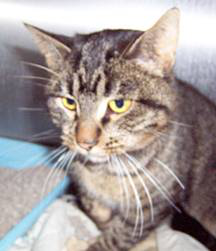

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
img_path = './dogscats/train/cats/cat.9021.jpg'
Image.open(img_path)

### 画像サイズを変更する

In [0]:
def img_resize(img, out_size, is_file_path=True):
  if (is_file_path):
    img = Image.open(img)
  else:
    #Chainerの「チャネル、縦、横」→「縦、横、チャネル」にする
    #後で、TransformDatasetを作ると気にこちらを使います
    #※image_dataset.pyの中で、transpose(2, 0, 1)をしてくれているので、
    #  リサイズするなら、transpose(1, 2, 0)が必要なようです
    img = Image.fromarray(img.transpose(1, 2, 0))
  
  resized_img = img.resize(out_size, Image.BICUBIC)
    
  return resized_img

<PIL.Image.Image image mode=RGB size=120x120 at 0x7F3F6F281240>


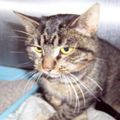

In [10]:
resized_img = img_resize('./dogscats/train/cats/cat.9021.jpg', (120, 120))
print(resized_img)
resized_img

### shapeを「チャンネル，縦，横」にする

In [11]:
#ndarray型に変換(縦、横がわかりやすいように、サイズを変えてます)
resized_img = img_resize('./dogscats/train/cats/cat.9021.jpg', (120, 200))
img_array = np.array(resized_img)

#shapeを確認する
img_array.shape

(200, 120, 3)

**※image_dataset.pyの中で、transpose(2, 0, 1)をしてくれているので、
リサイズをしないのであれば、不要な処理です。 **

In [0]:
#shapeを「チャンネル，縦，横」にする
def img_to_chainer_shape(img):
  img_array = np.array(img)
  return img_array.transpose(2, 0, 1)

In [13]:
#変わっていることを確認する
img = np.array(img_to_chainer_shape(img_resize('./dogscats/train/cats/cat.9021.jpg', (120, 200))))
img.shape

(3, 200, 120)

### TransformDataset型にする
メモリに展開しないで、データセットを作ります。[ここ](https://qiita.com/mitmul/items/5502ecdd2f0b444c427f)を参考にしました。

In [0]:
from chainer import datasets
cats_train_path = 'dogscats/train/cats/'
dogs_train_path = 'dogscats/train/dogs/'
cats_valid_path = 'dogscats/valid/cats/'
dogs_valid_path = 'dogscats/valid/dogs/'

In [0]:
filepath_and_label_list = []

In [0]:
import os

def get_image_filepath_list(dir, label):
  filepath_list = []
  files = os.listdir(dir)
  for file in files:
    filepath_list.append((dir + file, label))
  return filepath_list

In [0]:
#学習と検証データを一緒にしてます
filepath_and_label_list.extend(get_image_filepath_list(cats_train_path, 0))
filepath_and_label_list.extend(get_image_filepath_list(dogs_train_path, 1))
filepath_and_label_list.extend(get_image_filepath_list(cats_valid_path, 0))
filepath_and_label_list.extend(get_image_filepath_list(dogs_valid_path, 1))

In [0]:
# 各データに行う変換
def transform(inputs):
  img , label = inputs
  #サイズ変換
  img = img_resize(img.astype(np.uint8), (120, 120), False)
  #Chainer用のChapeにする
  img = img_to_chainer_shape(img)
  #スケーリング(データを0～1の間にする)
  img = img.astype(np.float32) / 255
  # ランダムに左右反転
  if np.random.rand() > 0.5:
      img = img[..., ::-1]
  return img, label

In [0]:
from chainer.datasets import LabeledImageDataset

# データセット作成
d = LabeledImageDataset(filepath_and_label_list)

In [0]:
from chainer.datasets import TransformDataset
#変換をメソッドを設定する
td = TransformDataset(d, transform)

## 学習する

### データセットを学習、検証で分ける

In [0]:
from chainer import datasets

train, valid = datasets.split_dataset_random(td, int(len(d) * 0.8), seed=0)

###モデルを定義する

[ここ](https://qiita.com/mitmul/items/1e35fba085eb07a92560)を参考にしました。

In [0]:
import chainer
import chainer.functions as F
import chainer.links as L
from chainer import training,serializers,Chain,datasets,sequential,optimizers,iterators
from chainer.training import extensions,Trainer
from chainer.dataset import concat_examples

In [0]:
class CNN(Chain):
  def __init__(self):
    super(CNN, self).__init__()
    
    with self.init_scope():
      self.conv1 = L.Convolution2D(None, out_channels=32, ksize=3, stride=1, pad=1)
      self.conv2 = L.Convolution2D(in_channels=32, out_channels=64, ksize=3, stride=1, pad=1)
      self.conv3 = L.Convolution2D(in_channels=64, out_channels=128, ksize=3, stride=1, pad=1)
      self.conv4 = L.Convolution2D(in_channels=128, out_channels=256, ksize=3, stride=1, pad=1)
      self.l1 = L.Linear(None, 1000)
      self.l2 = L.Linear(1000, 2)
    
  def __call__(self, x):
    f = F.max_pooling_2d(F.relu(self.conv1(x)), ksize=2, stride=2)
    f = F.max_pooling_2d(F.relu(self.conv2(f)), ksize=2, stride=2)
    f = F.max_pooling_2d(F.relu(self.conv3(f)), ksize=2, stride=2)
    f = F.max_pooling_2d(F.relu(self.conv4(f)), ksize=2, stride=2)
    f = F.dropout(F.relu(self.l1(f)), ratio=0.75)
    f = self.l2(f)
    return f

In [0]:
batchsize = 32
max_epoch = 10
gpu_id = 0

In [25]:
model = L.Classifier(CNN())
model.to_gpu(gpu_id)

In [0]:
train_iter = iterators.MultiprocessIterator(train, batchsize)
valid_iter = iterators.MultiprocessIterator(valid, batchsize, False, False)

In [0]:
optimaizer = optimizers.Adam().setup(model)
updater = training.StandardUpdater(train_iter, optimaizer, device=gpu_id)
trainer = Trainer(updater, stop_trigger=(max_epoch, 'epoch'))

trainer.extend(extensions.LogReport())
trainer.extend(extensions.Evaluator(valid_iter, model, device=gpu_id), name='val')
trainer.extend(extensions.PrintReport(['epoch', 'main/loss', 'main/accuracy', 'val/main/loss', 'val/main/accuracy', 'elapsed_time']))
trainer.extend(extensions.snapshot(filename='snapshot_epoch-{.updater.epoch}'))
trainer.extend(extensions.PlotReport(['main/loss', 'val/main/loss'], x_key='epoch', file_name='loss.png'))
trainer.extend(extensions.PlotReport(['main/accuracy', 'val/main/accuracy'], x_key='epoch', file_name='accuracy.png'))
trainer.extend(extensions.ProgressBar())
trainer.extend(extensions.dump_graph('main/loss'))

学習スタート！

ProgressBarも、１エポックごとに表示できたらいいに、、、って思います。
終わる時間が知りたいだけです。

In [28]:
trainer.run()

epoch       main/loss   main/accuracy  val/main/loss  val/main/accuracy  elapsed_time
     total [..................................................]  1.60%
this epoch [########..........................................] 16.00%
       100 iter, 0 epoch / 10 epochs
       inf iters/sec. Estimated time to finish: 0:00:00.
     total [#.................................................]  3.20%
this epoch [################..................................] 32.00%
       200 iter, 0 epoch / 10 epochs
     6.177 iters/sec. Estimated time to finish: 0:16:19.434320.
     total [##................................................]  4.80%
this epoch [########################..........................] 48.00%
       300 iter, 0 epoch / 10 epochs
     6.133 iters/sec. Estimated time to finish: 0:16:10.154462.
     total [###...............................................]  6.40%
this epoch [################################..................] 64.00%
       400 iter, 0 epoch / 10 epochs
    6.1124 it

     total [####################..............................] 40.00%
this epoch [..................................................]  0.00%
      2500 iter, 4 epoch / 10 epochs
    4.6024 iters/sec. Estimated time to finish: 0:13:34.784668.
     total [####################..............................] 41.60%
this epoch [########..........................................] 16.00%
      2600 iter, 4 epoch / 10 epochs
    4.5804 iters/sec. Estimated time to finish: 0:13:16.876728.
     total [#####################.............................] 43.20%
this epoch [################..................................] 32.00%
      2700 iter, 4 epoch / 10 epochs
     4.621 iters/sec. Estimated time to finish: 0:12:48.232869.
     total [######################............................] 44.80%
this epoch [########################..........................] 48.00%
      2800 iter, 4 epoch / 10 epochs
    4.6596 iters/sec. Estimated time to finish: 0:12:20.404846.
     total [################

8           0.218164    0.91135        0.234945       0.901274           1094.68       
     total [########################################..........] 80.00%
this epoch [..................................................]  0.00%
      5000 iter, 8 epoch / 10 epochs
    4.5907 iters/sec. Estimated time to finish: 0:04:32.288552.
     total [########################################..........] 81.60%
this epoch [########..........................................] 16.00%
      5100 iter, 8 epoch / 10 epochs
     4.582 iters/sec. Estimated time to finish: 0:04:10.980242.
     total [#########################################.........] 83.20%
this epoch [################..................................] 32.00%
      5200 iter, 8 epoch / 10 epochs
    4.6042 iters/sec. Estimated time to finish: 0:03:48.054527.
     total [##########################################........] 84.80%
this epoch [########################..........................] 48.00%
      5300 iter, 8 epoch / 10 epochs
    

### 学習結果を確認する

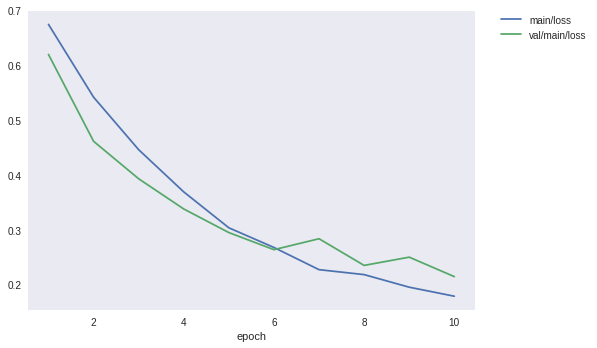

In [30]:
Image.open('result/loss.png')

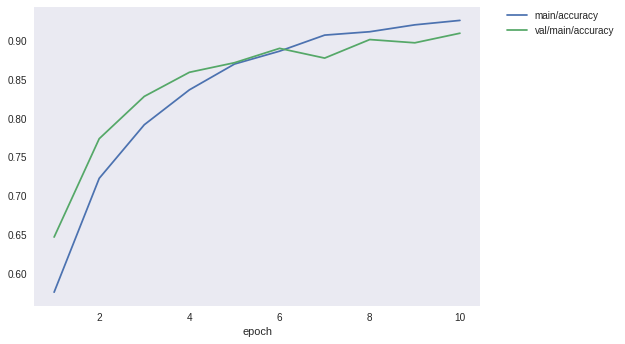

In [31]:
Image.open('result/accuracy.png')

### 学習済みモデルを保存する

Google Driveに出力します。[ここ](https://qiita.com/5at00001040/items/d7867974d2fd1d21dbbf)を参考にしました。

In [34]:
#保存するフォルダを確認する
%%bash
ls

datalab
dogscats
dogscats.zip
result


In [35]:
#resultの中に、snapshotができているので、確認する
%%bash
ls result

accuracy.png
cg.dot
log
loss.png
snapshot_epoch-1
snapshot_epoch-10
snapshot_epoch-2
snapshot_epoch-3
snapshot_epoch-4
snapshot_epoch-5
snapshot_epoch-6
snapshot_epoch-7
snapshot_epoch-8
snapshot_epoch-9


### GoogleDriveへの接続

In [0]:
!pip install -U -q PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### 最後のエポックのスナップをGoogleDriveに保存する

In [0]:
snap_file_name = "result/snapshot_epoch-" + str(max_epoch)
upload_file = drive.CreateFile()
upload_file.SetContentFile(snap_file_name)
upload_file.Upload()

## 検証する

### GoogleDriveへ接続する（上を参照　既に接続済みなら不要です）

### GoogleDriveからファイルを取得する

上で、GoogleDriveにアップロードしたファイルに対し、GoogleDriveで「共有可能なリンクを取得」する必要があります。

In [0]:
downloaded = drive.CreateFile({'id':'1fBXV-bJojIUr7cf6fXbNwGnVfjCsmKOX'})
downloaded.GetContentFile('snapshot_epoch-'+ str(max_epoch))

### 学習済みモデルを読み込む

In [42]:
model = L.Classifier(CNN())
    
infer_net = model
serializers.load_npz('snapshot_epoch-' + str(max_epoch), infer_net, path='updater/model:main/')

infer_net.to_gpu(0)

※ infer_net.xp.asarray(x)がないと、以下のエラーになります。[ここ](https://qiita.com/mitmul/items/1e35fba085eb07a92560#chainerusing_configtrain-false)を参考にしました。

※ x[None, ...]がないと、以下のエラーになります。 [ここ](https://qiita.com/nagayosi/items/14f243c058f5a1e7044b)を参考にしました。

In [0]:
def get_x_test(file_path, size, show=True):
  if show:
    plt.imshow(Image.open(file_path))
  #リサイズ
  x = img_resize(file_path, size, True)
  #リシェイプ
  x = img_to_chainer_shape(x)
  #型変換
  #float32にする
  x = x.astype(np.float32)
  # ネットワークと同じデバイス上にデータを送る
  x = infer_net.xp.asarray(x)
  #[ミニバッチ、チャネル、高さ、幅]にする
  x = x[None, ...]
  return x

In [0]:
from chainer.cuda import to_cpu

def cat_or_dog(img):
  with chainer.using_config('train', False), chainer.using_config('enable_backprop', False):
      y = infer_net.predictor(x_test)

  y = to_cpu(y.array)

  print(y)

  y = y.argmax(axis=1)[0]

  print(y)

  if y == 0:
    y = '猫'
  else:
    y = '犬'

  print('予測ラベル:', y)

[[ 207.68208 -190.89265]]
0
予測ラベル: 猫


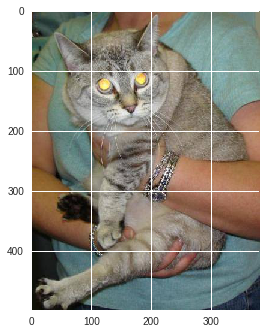

In [68]:
x_test = get_x_test('dogscats/test1/3221.jpg', (120, 120))
cat_or_dog(x_test)

###狐を試してみる

In [0]:
import os
import requests
import zipfile

#狐の画像を取得します。
file_name = "gahag-0043991303-1.jpg"
url='http://gahag.net/img/201601/08s/gahag-0043991303-1.jpg'
response = requests.get(url)
with open(os.path.join("./", file_name), 'wb') as f:
    f.write(response.content)

In [74]:
%%bash
ls

datalab
dogscats
dogscats.zip
gahag-0043991303-1.jpg
result
snapshot_epoch-10


狐はどっちかと言えば猫よりなんですかね。。。
耳がピーンとなっている奴を、猫と判断している気がします。。。

[[ 235.39919 -234.93518]]
0
予測ラベル: 猫


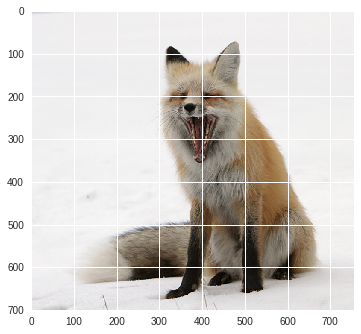

In [80]:
x_test = get_x_test(file_name, (120, 120))
cat_or_dog(x_test)

キティちゃんの画像で試しました。
まさかの犬！耳ピーンってなっているのに、、、

[[-225.40201  214.4188 ]]
1
予測ラベル: 犬


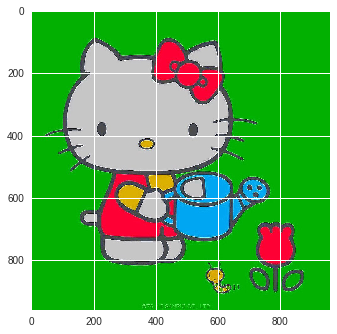

In [81]:
#キティちゃんの画像を取得します。
file_name = "75200942.jpeg"
url = 'https://pics.prcm.jp/91aad748736f7/75200942/jpeg/75200942.jpeg'
response = requests.get(url)
with open(os.path.join("./", file_name), 'wb') as f:
    f.write(response.content)
    
#検証
x_test = get_x_test(file_name, (120, 120))
cat_or_dog(x_test)

ドラえもんでも試しました。犬ですね。。。

[[-167.2641   163.76842]]
1
予測ラベル: 犬


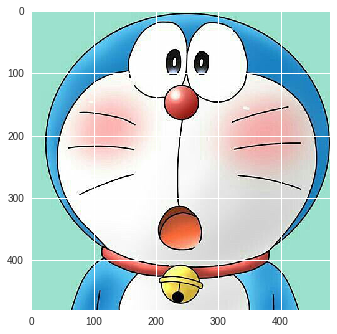

In [83]:
#ドラえもんの画像を取得します。
file_name = "73730597.jpeg"
url = 'https://pics.prcm.jp/c58b8a9561741/73730597/jpeg/73730597.jpeg'
response = requests.get(url)
with open(os.path.join("./", file_name), 'wb') as f:
    f.write(response.content)
    
#検証
x_test = get_x_test(file_name, (120, 120))
cat_or_dog(x_test)

ポムポムは、正しく犬をなりました！

[[-266.3103   254.03368]]
1
予測ラベル: 犬


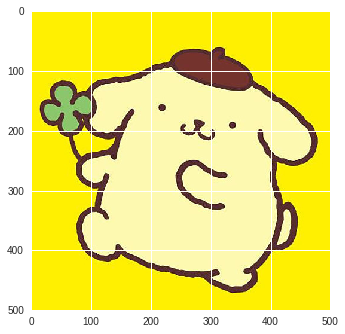

In [85]:
  #ポムポムの画像を取得します。
file_name = "76006578.jpeg"
url = 'https://pics.prcm.jp/d1a9c3993e68f/76006578/jpeg/76006578.jpeg'
response = requests.get(url)
with open(os.path.join("./", file_name), 'wb') as f:
    f.write(response.content)
    
#検証
x_test = get_x_test(file_name, (120, 120))
cat_or_dog(x_test)

##まとめ

画像取得から、検証までの流れができて面白ったです。
これで、いろんなデータセットに挑戦できるという気がしてきたので、
ほかのデータセットにチャレンジしていきます！